## 6.2 Convolution neural network introduction

用深度学习解决图像识别的问题，关键是抽象。

抽象就是把图像中的各种零散的特征通过某种方式汇总起来，形成新的特征，而利用这些新的特征区分图像的类别。

通过监督学习，分类任务能借助这些抽取出来的更具备区分作用的特征来更好的完成。

深度神经网络最上层的特征是最抽象的。

抽象的核心是建立特征，或者叫特征工程。

在传统的特征工程里，我们定义了一个叫过滤器（filter）的工具。

过滤器带有特征指示，比如十字型过滤器等，它用来探测图像中是否具有十字型特征和图像中哪里具有十字型特征。

十字型过滤器的作用就是对图像的局部像素进行卷积运算，使得过滤后的新图像在原图像中具有十字型特征的地方信号更强，在原图像中不具备十字型特征的地方信号更弱。这是一个基于过滤器的“去噪存真”的过程。

我们通常会先构造一系列事先定义好的过滤器，然后从左到右挨个扫描图片的各个部分。这样每个过滤器会产生一个过滤后的图像，而这个图像又可以把是否具有过滤器提示的形状和哪里有这个形状表示出来，这样就起到了抽象的作用。

通过这些抽象，再加以一些分类方法，比如支持向量机（SVM）等完成分类任务。这里的挑战是要大量地尝试和构造各种过滤器。

过滤器扫描RGB图像，每次扫描一个局部，这样返回一个平面。当有多个过滤器作用的时候，这些平面就可以叠加，形成三维立体状。

扫描RGB图像用的过滤器一般是三维的。

卷积神经网络的威力在于其可以自动学习过滤器。

主要是因为卷积神经网络有反馈机制。

这决定了以下几点：
1. 过滤器必须对分类有帮助。不能随便定义过滤器，如果随便定义过滤器，那么它就不能有效地分类，准确率会很不理想。
2. 网络有调整机制。如果将任务分给了一个随机的过滤器，分类不行怎么办？系统会知道应该在哪里调过滤器的权重，往什么方向调，和各层网络之间的权重怎么调整等。

卷积神经网络是深度学习的一种模型。它和一般的深度学习模型的主要区别是对模型有两个强假设。
1. 一般的深度学习模型只是假设模型有几层，每层有几个节点，然后把上下层之间的节点全部连接起来。这种模型的优点是灵活，缺点是灵活带来的副作用，即过度拟合。因为模型的参数太多，会把训练数据的噪音也模拟进去，从而让模型的普适性大打折扣。
2. 卷积神经网络和包括循环神经网络、长短记忆网络等其他模型之所以更流行，就是因为它们对模型有两个强假设，而这些强假设在某些特定任务中是合理的，比如卷积神经网络用于图像识别，循环神经网络和长短记忆网络用于自然语言处理任务。

两个强假设：
1. **参数共享**。过滤器一般需要的参数比较少，比如5×5×3的过滤器需要75个参数就可以了。这和多层神经网络相比，相当于我们只是把隐含层和局部输入联系在一起，而这两层之间的权重只需要75个参数。其他超过这个局部范围的区域的网络权重都是0。当然只有一个过滤器是不够的，我们需要构造多个过滤器，不过总体来说省了很多参数。
2. **局部像素的相关性**，即局部区域的像素值一般差的不太多。基于此衍生了一种处理技术——Max Pooling，即在局部，比如在224×224的格子里，取局部区域像素值的最大值。在图像中，局部像素值之间是有相关性的，所以取局部最大像素值并没有损失很多信息。进行MaxPooling之后得到的图像维度以平方比的速度缩小。这个简单的假设大大节省了后续参数。

卷积神经网络利用过滤器遍历图像进行局部扫描，而全连接神经网络可以被认为是全局扫描。

这么一来，卷积神经网络和全连接神经网络的关系自然就是辩证统一的了：对一个224×224×3的图像利用1000个长相为224×224×3的过滤器进行扫描，这就回到了我们熟悉的全连接神经网络模型。这里的过滤器扫描的“局部区域”即“全部区域”。

可以这么理解：每个类都对应着一个过滤器，给定了1000个过滤器以后，这1000个类别所对应的值也就给定了，最后进行分类时取1000个数值中的最大值就可以了。这里的过滤器等价于全连接神经网络的每个输出节点和所有输入层节点的权重。

从另一个角度看，任何一个卷积神经网络其实都是通过对整个神经网络权重附加参数共享这一限制而实现的。所以卷积神经网络和全连接神经网络是可以相互转换的。

一般一个卷积层包括3个部分：卷积步骤、非线性变化（一般是relu、tanh、sigmoid等）和Max Pooling。有的网络还包括了Dropout这一步。

总结来说，一些流行的卷积神经网络，比如LeNet、VGG16等，都是通过构造多层的卷积层，使得原来“矮胖”型的图像输入层（224×224×3）立体，变成比如1×1×4096之类的“瘦长”型立体，最后做一个单层的网络，把“瘦长”型立体和输出层（类别）联系在一起。

几个流行的卷积神经网络：
1. AlexNet: ImageNet Classification with Deep Convolutional Neural Networks，NIPS 2012
![AlexNet](https://world4jason.gitbooks.ioresearchlog)
2. LeNet: Gradient-based learning applied to document recognition. Proceedings of the IEEE, ovember 1998
![LeNet](https://www.pyimagesearch.com)
3. VGG16: Very Deep Convolutional Networks for Large-Scale Image Recognition
![VGG16](http://blog.christianperone.com)
4. VGG19: Very Deep Convolutional Networks for Large-Scale Image Recognition
![VGG19](https://www.slideshare.net/ckmarkohchang)

关于卷积神经网络还要补充两点内容。
1. 在局部扫描的过程中，有一个参数叫步长，就是指过滤器以多大的跨度上下或左右平移地扫描。
2. 对于经由过滤器局部扫描后的卷积层图像，由于处理边界不同，一般有两种处理方式。
    1. 一种是在局部扫描过程中对图像边界以外的一层或多层填上0，平移的时候可以将其移出边界到达0的区域。这样的好处是在以1为步长的局部扫描完以后，所得的新图像和原图像长宽一致，被称作zero padding（same padding）。
    2. 另一种是不对边界外做任何0的假定，所有平移都在边界内，被称作valid padding，使用这种方式通常扫描完的图像尺寸会比原来的小。

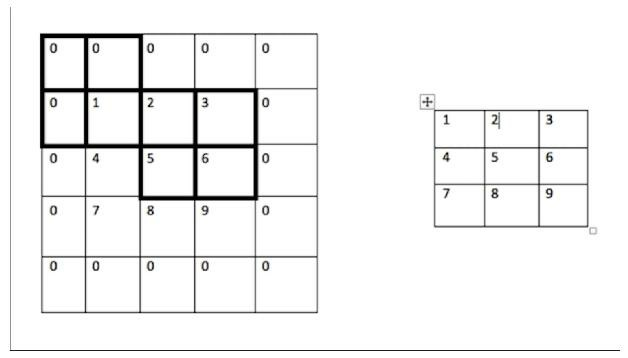
左图是same padding（zero padding），右图是valid padding。